In [1]:
import pandas as pd


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df=pd.read_csv('Power_consumption.csv')

C:\Users\Reze\AppData\Local\Temp\ipykernel_4256\167496763.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Power_consumption.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('Datetime', inplace=True)

C:\Users\Reze\AppData\Local\Temp\ipykernel_4256\3558526131.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [8]:
import numpy as np
df = df.replace('?', np.nan)
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

In [9]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
for val in df.columns:
  Q1 = df[val].quantile(0.25)
  Q3 = df[val].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  outliers = df[(df[val] < lower_limit) | (df[val] > upper_limit)]
  print(outliers.shape)
  print(f'outliers in {val}')
  print(outliers)


(94907, 7)
outliers in Global_active_power
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 09:37:00                3.632                  0.064   239.20   
2010-11-26 09:38:00                3.616                  0.062   238.92   
2010-11-26 09:39:00                3.632                  0.064   239.56   
2010-11-26 09:40:00                3.552                  0.064   239.84   
2010-11-26 09:41:00                3.552     

In [11]:
for val in df.columns:
  df[val]=df[val].fillna(df[val].median())

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
df=df.drop_duplicates()

In [14]:
for val in df.columns:
  Q1 = df[val].quantile(0.25)
  Q3 = df[val].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  outliers = df[(df[val] < lower_limit) | (df[val] > upper_limit)]
  print(outliers.shape)
  print(f'outliers in {val}')
  print(outliers)


(88194, 7)
outliers in Global_active_power
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 09:37:00                3.632                  0.064   239.20   
2010-11-26 09:38:00                3.616                  0.062   238.92   
2010-11-26 09:39:00                3.632                  0.064   239.56   
2010-11-26 09:40:00                3.552                  0.064   239.84   
2010-11-26 09:41:00                3.552     

In [15]:
for val in df.columns:
  Q1 = df[val].quantile(0.25)
  Q3 = df[val].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  outliers = df[(df[val] < lower_limit) | (df[val] > upper_limit)]
  df = df[(df[val] >= lower_limit) & (df[val] <= upper_limit)]

In [16]:
df.shape

(1588003, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588003 entries, 2006-12-16 17:53:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1588003 non-null  float64
 1   Global_reactive_power  1588003 non-null  float64
 2   Voltage                1588003 non-null  float64
 3   Global_intensity       1588003 non-null  float64
 4   Sub_metering_1         1588003 non-null  float64
 5   Sub_metering_2         1588003 non-null  float64
 6   Sub_metering_3         1588003 non-null  float64
dtypes: float64(7)
memory usage: 96.9 MB


In [18]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)


In [19]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend
Datetime,,,,,,,,,,,,
2006-12-16 17:53:00,3.178,0.000,235.28,13.4,0.0,0.0,17.0,17,16,12,5,1
2006-12-16 17:54:00,2.720,0.000,235.06,11.6,0.0,0.0,17.0,17,16,12,5,1
2006-12-16 17:59:00,2.472,0.058,236.94,10.4,0.0,0.0,17.0,17,16,12,5,1
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0,18,16,12,5,1
2006-12-16 18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,18,16,12,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,26,11,4,0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,26,11,4,0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,26,11,4,0


In [20]:
df['total_sub_metering'] = (
    df['Sub_metering_1'] +
    df['Sub_metering_2'] +
    df['Sub_metering_3']
)


In [21]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend,total_sub_metering
Datetime,,,,,,,,,,,,,
2006-12-16 17:53:00,3.178,0.000,235.28,13.4,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 17:54:00,2.720,0.000,235.06,11.6,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 17:59:00,2.472,0.058,236.94,10.4,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0,18,16,12,5,1,18.0
2006-12-16 18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,18,16,12,5,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,26,11,4,0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,26,11,4,0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,26,11,4,0,0.0


<Axes: xlabel='Datetime'>

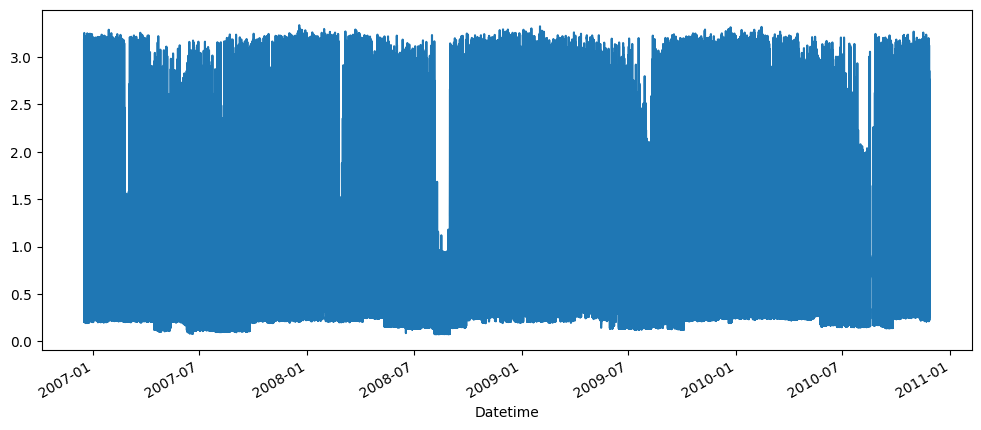

In [22]:
import matplotlib.pyplot as plt
df['Global_active_power'].plot(figsize=(12,5))


<Axes: xlabel='hour'>

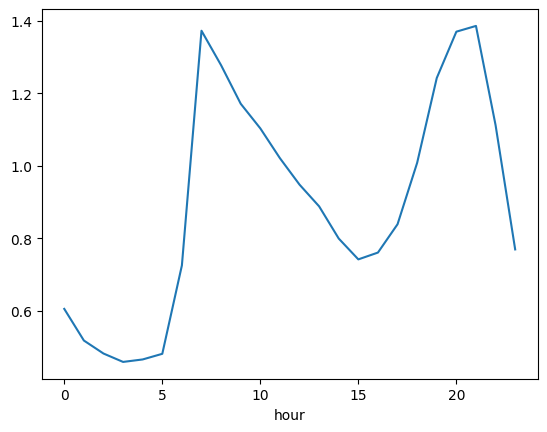

In [23]:
df.groupby('hour')['Global_active_power'].mean().plot()


<Axes: >

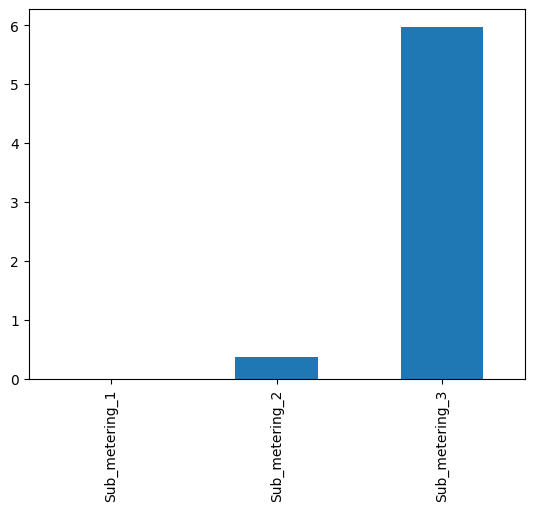

In [24]:
df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean().plot(kind='bar')


In [25]:
peak_hours = df[df['Global_active_power'] > df['Global_active_power'].quantile(0.90)]


In [26]:
peak_hours

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend,total_sub_metering
Datetime,,,,,,,,,,,,,
2006-12-16 17:53:00,3.178,0.000,235.28,13.4,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 17:54:00,2.720,0.000,235.06,11.6,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 17:59:00,2.472,0.058,236.94,10.4,0.0,0.0,17.0,17,16,12,5,1,17.0
2006-12-16 18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0,18,16,12,5,1,18.0
2006-12-16 18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,18,16,12,5,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 19:46:00,2.764,0.192,234.42,12.0,0.0,0.0,0.0,19,26,11,4,0,0.0
2010-11-26 19:47:00,2.132,0.090,236.07,9.6,0.0,0.0,0.0,19,26,11,4,0,0.0
2010-11-26 20:05:00,2.300,0.084,238.84,10.0,0.0,2.0,0.0,20,26,11,4,0,2.0


<Axes: xlabel='hour'>

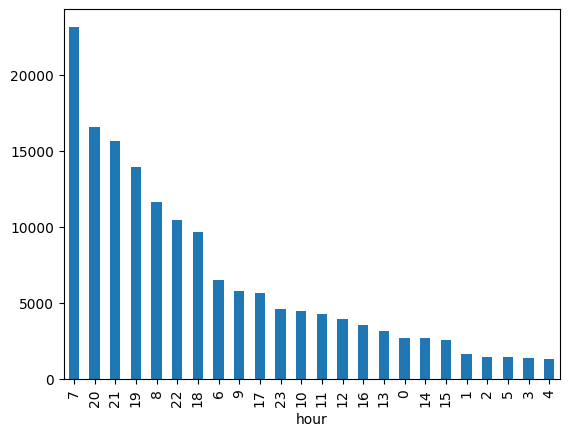

In [27]:
peak_hours['hour'].value_counts().plot(kind='bar')

#

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd
X = df.drop(columns=['Global_active_power'],axis=1)
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [31]:
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
mse

0.0008568905290701506

In [36]:
r2=r2_score(y_test, predictions)
r2

0.9982891323815543

C:\Users\Reze\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Reze\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


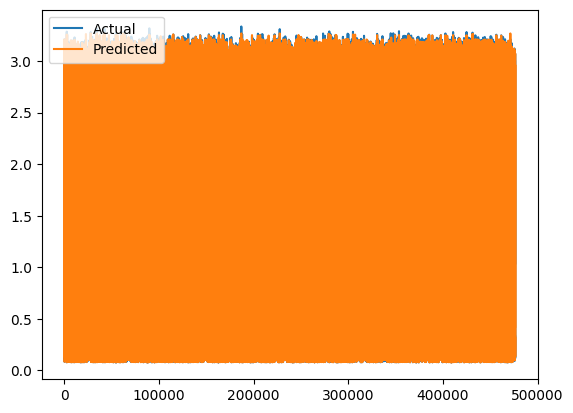

In [37]:
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()